# Mongolian Handwritten Character Classification using Deep Learning

### Fetching datasets from Kaggle

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
#%cd /content/gdrive/My Drive/Kaggle

In [ ]:
#!ls

In [ ]:
#! kaggle datasets download -d vimpigro/handwritten-mongolian-cyrillic-characters-database

In [ ]:
#!unzip \*.zip  && rm *.zip

### Setting up the directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Kaggle'

/content/drive/MyDrive/Kaggle


In [ ]:
%ls

 HMCC_all.csv         HMCC_letters_merged.csv    kaggle.json
'HMCC balanced.csv'  'HMCC similar merged.csv'   PSET2


### Installing and Importing Packages 

In [ ]:
!pip install -Uqq fastai --upgrade
!pip install -Uqq fastcore --upgrade

     |████████████████████████████████| 204kB 28.3MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 


In [ ]:
import fastai
import fastcore
import numpy as np
import csv
from PIL import Image    
import matplotlib.pyplot as plt
import os
print('Fast.ai version:', fastai.__version__)
print('Fastcore version:', fastcore.__version__)

Fast.ai version: 2.3.1
Fastcore version: 1.3.20


In [ ]:
from fastai.vision.all import *

In [ ]:
!nvidia-smi

Tue May 11 03:11:24 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Importing data

In [ ]:
df_all = pd.read_csv('HMCC_all.csv',
                     delimiter = ',')
df_all.head()

,38,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.452,0.453,0.454,0.455,0.456,0.457,0.458,0.459,0.460,0.461,0.462,0.463,0.464,0.465,0.466,0.467,0.468,0.469,0.470,0.471,0.472,0.473,0.474,0.475,0.476,0.477,0.478,0.479,0.480,0.481,0.482,0.483,0.484,0.485,0.486,0.487,0.488,0.489,0.490,0.491
0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,234,231,228,175,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,213,165,123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_letters = pd.read_csv('HMCC_letters_merged.csv', delimiter = ',')
df_letters.head()

,31,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.484,0.485,0.486,0.487,0.488,0.489,0.490,0.491,0.492,0.493,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523
0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,192,192,165,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,136,105,77,46,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Here is a diagram that shows what actions will be taken. 

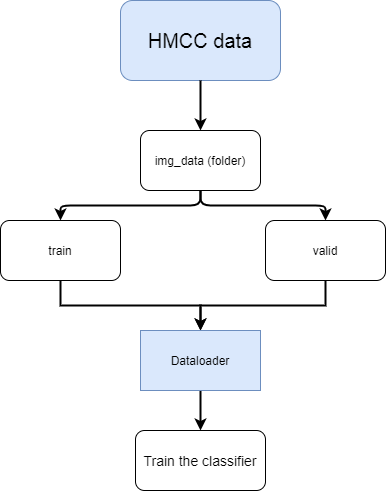

# HMCC_letters 

### Splitting data into the train and test (validation).

We will use a 1/6 ratio to split data into the train and valid.  

In [ ]:
#All images will be stored in this  folder: 
os.mkdir('/root/img_data/')

In [ ]:
%cd '/root/img_data/'

/root/img_data


#### Preparing the training data 

In [ ]:
os.mkdir('train')
%cd '/root/img_data/train'

for n in range(0,66):
  os.mkdir(str(n))

for index, row in df_letters.iloc[30624:183748].iterrows():
  fname = row.values[0]
  image = np.array(row.values[1:]).reshape(28,28)
  image = Image.fromarray(image.astype(np.uint8))
  image.save(str(fname)+"/"+str(index)+".png")

/root/img_data/train


#### Preparing the validation data

In [ ]:
%cd '/root/img_data/'
os.mkdir('test')
%cd '/root/img_data/test'

for n in range(0,66):
  os.mkdir(str(n))

for index, row in df_letters.iloc[0:30624].iterrows():
  fname = row.values[0]
  image = np.array(row.values[1:]).reshape(28,28)
  image = Image.fromarray(image.astype(np.uint8))
  image.save(str(fname)+"/"+str(index)+".png")

/root/img_data
/root/img_data/test


### Creating DataLoader

In [ ]:
path = '/root/img_data/'
dls = ImageDataLoaders.from_folder(path, train='train', valid='test')

In [ ]:
fnames = get_image_files(path)

In [ ]:
len(fnames)

183748

In [ ]:
fnames[183747]

Path('/root/img_data/test/14/24403.png')

## Training the image classifier

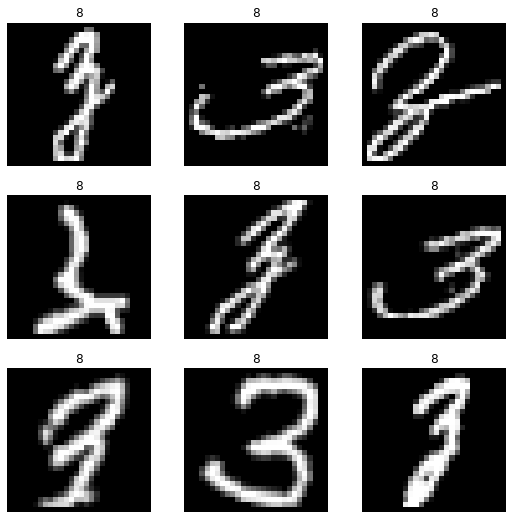

In [ ]:
dls.valid.show_batch()

- We are using a default size of batch. The reason why I am not increasing the size is to prevent overfitting. The default will work fine. 
- We are not going to do transfer learning. So, I chose "pretrained = False". Also, I have to use "learn.fit" instead of "learn.fine_tune". 

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy, pretrained=False)
learn.fit(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.385834,0.392214,0.883000,03:13
1,0.255028,0.216528,0.936586,03:10
2,0.214233,0.177794,0.947231,03:09
3,0.169464,0.169412,0.949060,03:09
4,0.153646,0.155308,0.953468,03:10
5,0.120060,0.130225,0.960423,03:10
6,0.104526,0.127473,0.961827,03:11
7,0.096595,0.128415,0.961631,03:14
8,0.104789,0.134597,0.960652,03:15
9,0.068555,0.114055,0.967313,03:17


Same for HMCC_all set. 

# HMCC_all

In [ ]:
os.mkdir('/root/img_all/')

In [ ]:
%cd '/root/img_all/'

/root/img_all


### Preparing the train set

In [ ]:
os.mkdir('train')
%cd '/root/img_all/train'

for n in range(0,66):
  os.mkdir(str(n))

for index, row in df_all.iloc[61186:367116].iterrows():
  fname = row.values[0]
  image = np.array(row.values[1:]).reshape(28,28)
  image = Image.fromarray(image.astype(np.uint8))
  image.save(str(fname)+"/"+str(index)+".png")

/root/img_all/train


### Preparing the validation set

In [ ]:
%cd '/root/img_all'
os.mkdir('valid')
%cd '/root/img_all/valid'

for n in range(0,66):
  os.mkdir(str(n))

for index, row in df_all.iloc[0:61186].iterrows():
  fname = row.values[0]
  image = np.array(row.values[1:]).reshape(28,28)
  image = Image.fromarray(image.astype(np.uint8))
  image.save(str(fname)+"/"+str(index)+".png")

/root/img_all
/root/img_all/valid


In [ ]:
path = '/root/img_all/'

In [ ]:
dls_all = ImageDataLoaders.from_folder(path, train='train', valid='valid')

In [ ]:
fnames = get_image_files(path)

In [ ]:
len(fnames)

367115

## Training...

In [ ]:
learn_all = cnn_learner(dls_all, resnet18, metrics=accuracy, pretrained=False)

In [ ]:
learn_all.fit(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.572550,0.553522,0.801719,07:07
1,0.477583,0.422260,0.844556,06:52
2,0.405488,0.404804,0.849345,06:39
3,0.385199,0.355225,0.868140,06:37
4,0.350330,0.337010,0.873419,06:37
5,0.307206,0.321909,0.878698,06:34
6,0.305619,0.329089,0.876328,06:35
7,0.268482,0.307628,0.884581,06:36
8,0.251027,0.309156,0.885529,06:45
9,0.241567,0.307957,0.887115,06:48


# Results:
### - HMCC_letters : 96.7% (10 Epochs)
### - HMCC_all : 88.7% (10 Epochs)